In [13]:
# Importing standard packages
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from textwrap import fill 

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
import warnings
import math
warnings.filterwarnings("ignore")

# from sklearn.pipeline import Pipeline

#classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# classification metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer, label_binarize

# dummies
from sklearn.preprocessing import OneHotEncoder

# NLP libraries
from nltk.corpus import stopwords, wordnet
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
import re
from nltk import FreqDist
from nltk import pos_tag
from wordcloud import WordCloud 

# imbalanced-learn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [14]:
# loading the dataset
sentiment_data = pd.read_csv("../data/cleaned_sentiment_data.csv", encoding="ISO-8859-1")
sentiment_data


,text,sentiment,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1,3g iphone 3 hr tweet rise_austin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,3,know awesome ipad/iphone app 'll likely apprec...
2,@swonderlin Can not wait for #iPad 2 also. The...,3,wait ipad 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,1,hope year 's festival n't crashy year 's iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,3,great stuff fri sxsw marissa mayer google tim ...
...,...,...,...
9065,Ipad everywhere. #SXSW {link},3,ipad everywhere sxsw link
9066,"Wave, buzz... RT @mention We interrupt your re...",5,wave buzz rt interrupt regularly schedule sxsw...
9067,"Google's Zeiger, a physician never reported po...",5,google 's zeiger physician never report potent...
9068,Some Verizon iPhone customers complained their...,5,verizon iphone customer complain time fell bac...


In [15]:
# checking the data types
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9070 entries, 0 to 9069
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          9070 non-null   object
 1   sentiment     9070 non-null   object
 2   cleaned_text  9070 non-null   object
dtypes: object(3)
memory usage: 212.7+ KB


## **3.3 EDA**

### **3.3.1. Visualization of Target Variable**

In [16]:
# drop the irrelevant label and check the remaining labels

sentiment_data = sentiment_data.query('sentiment != "irrelevant"')

#confirm removal of the label
sentiment_data["sentiment"].value_counts()

sentiment
5    5375
3    2970
1     569
Name: count, dtype: int64

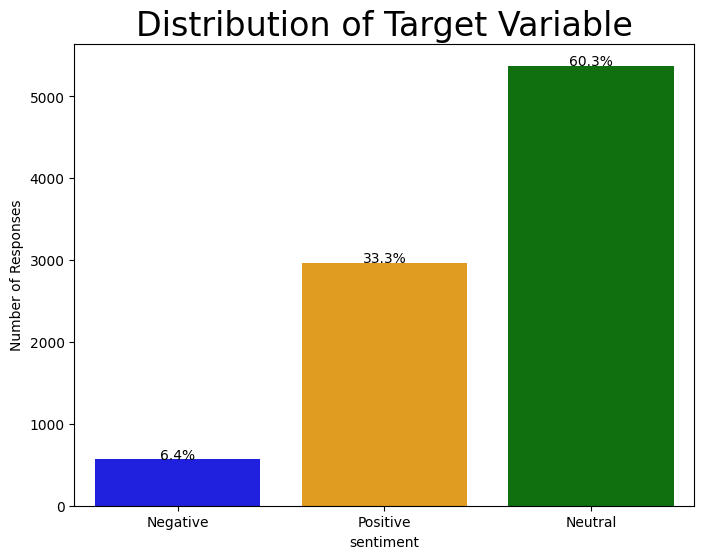

In [17]:
#visualizing the distribution of sentiment
#creating the seaborn count plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ["Blue", "Orange", "Green"]
ax = sns.countplot(x="sentiment", data=sentiment_data, ax=ax, palette=colors)

#calculating the total
total = len(sentiment_data)

#adding percentage annotation on each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{percentage:.1f}%', ha='center')


#labeling the graph
ax.set_xticklabels(["Negative", "Positive", "Neutral"])
plt.ylabel("Number of Responses")
#plt.xlabel("Sentiment")
ax.set_title("Distribution of Target Variable", fontsize=24)
plt.show()

#saving the plot as jpeg 
fig.savefig("../images/functionality_plot.jpeg", format="jpeg", dpi=300)

6.4% of the responses were negative, 33.3% positive while the remaining 60.3% were neutral. The data looks imbalanced with in that neutral takes more than 50% of the data and Negative less than 10%. 

### **3.3.2 Most Common word in the Dataset**
Frequently used words appear enlarged as compared to less frequently used words.

In [18]:
# convert sentiment column to integer
sentiment_data["sentiment"] = sentiment_data["sentiment"].astype(int)
sentiment_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8914 entries, 0 to 9069
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          8914 non-null   object
 1   sentiment     8914 non-null   int64 
 2   cleaned_text  8914 non-null   object
dtypes: int64(1), object(2)
memory usage: 278.6+ KB


In [19]:
print(sentiment_data['sentiment'].unique().dtype)

int64


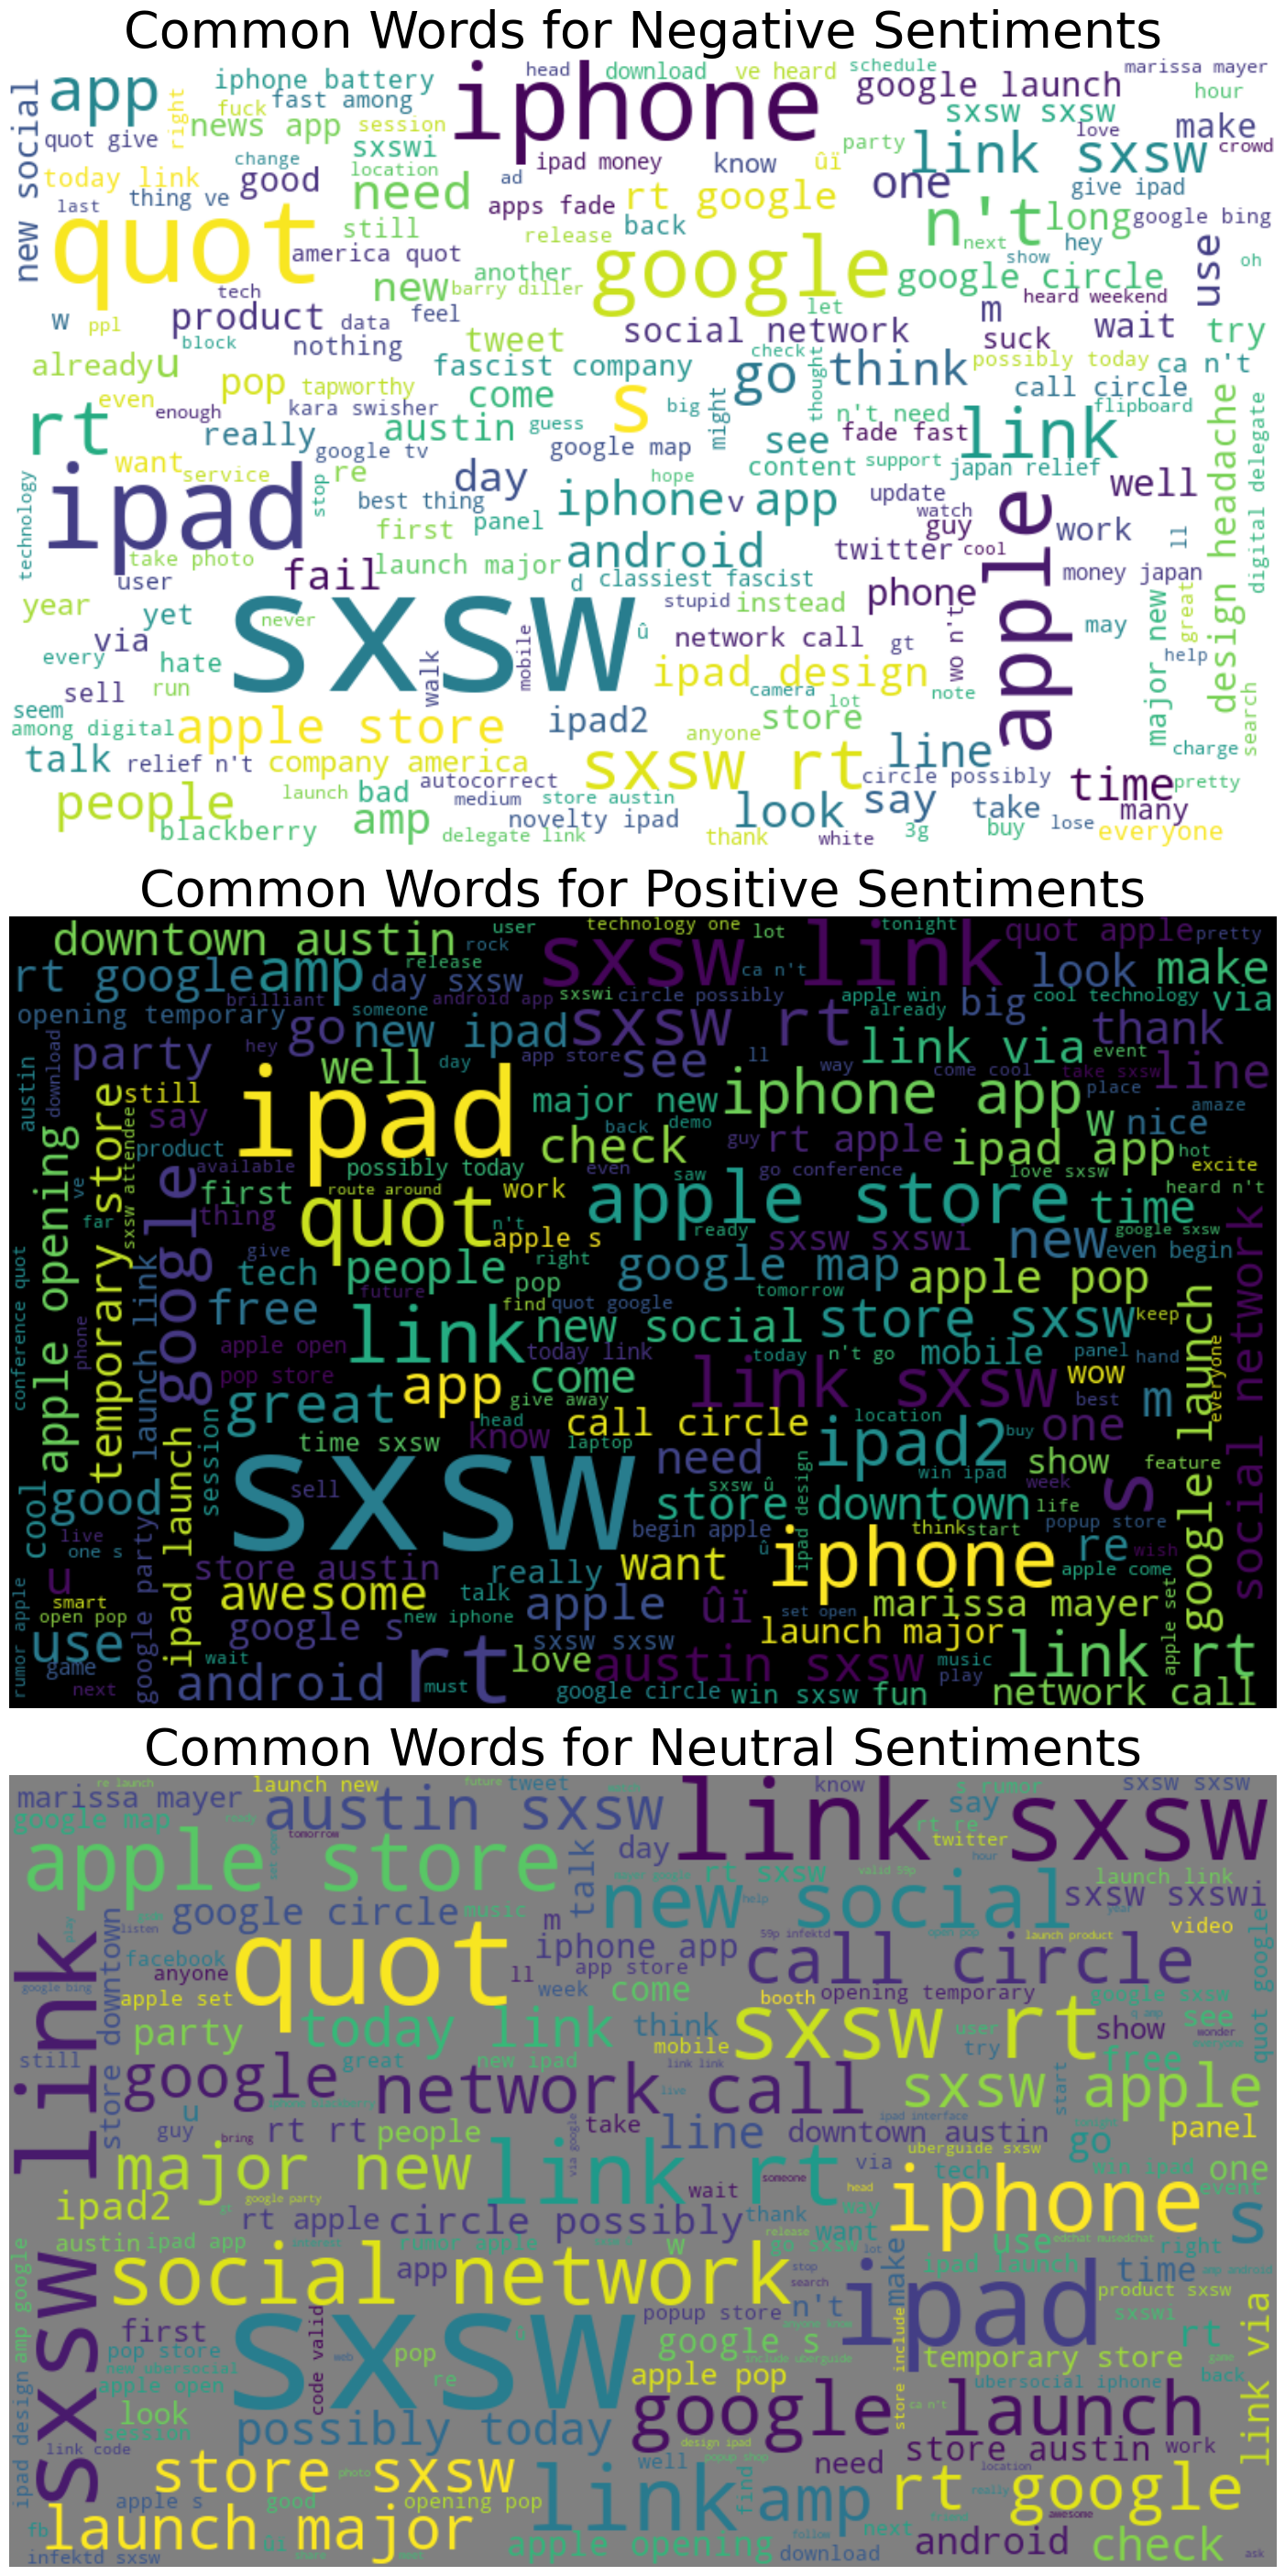

In [23]:
#create subplots
fig,axes = plt.subplots(3,1, figsize = (18, 28), constrained_layout = True)
axes = axes.flatten()

# negative words
negative_words = ' '.join(sentiment_data.query("sentiment==1")['cleaned_text'])
if negative_words.strip():
#generate word cloud
    wc_neg = WordCloud(
        width = 800,
        height = 500,
        random_state = 21,
        max_font_size = 110,
        background_color = "white",
        ).generate(negative_words) 

    axes[0].imshow(wc_neg, interpolation="bilinear")
    axes[0].axis('off')
    axes[0].set_title("Common Words for Negative Sentiments", fontsize=40)
fig.savefig("../images/negative_plot.jpeg", format="jpeg", dpi=300)


# positive words
positive_words = ' '.join(sentiment_data.query("sentiment==3")['cleaned_text'])
if positive_words.strip():
#generate word cloud
    wc_pos = WordCloud(
        width = 800,
        height = 500,
        random_state = 21,
        max_font_size = 110,
        background_color = "black",
        ).generate(positive_words) 

    axes[1].imshow(wc_pos, interpolation="bilinear")
    axes[1].axis('off')
    axes[1].set_title("Common Words for Positive Sentiments", fontsize=40)
    fig.savefig("../images/positive_plot.jpeg", format="jpeg", dpi=300)


# neutral/no-emotion words
neutral_words = ' '.join(sentiment_data.query("sentiment==5")['cleaned_text'])
if neutral_words.strip():
#generate word cloud
    neu_pos = WordCloud(
        width = 800,
        height = 500,
        random_state = 21,
        max_font_size = 110,
        background_color = "grey",
        ).generate(neutral_words) 

    axes[2].imshow(neu_pos, interpolation="bilinear")
    axes[2].axis('off')
    axes[2].set_title("Common Words for Neutral Sentiments", fontsize=40)
    fig.savefig("../images/neutral_plot.jpeg", format="jpeg", dpi=300)

plt.show()

Frequency Distribution of most common words (Negative, Neutral and Positive)

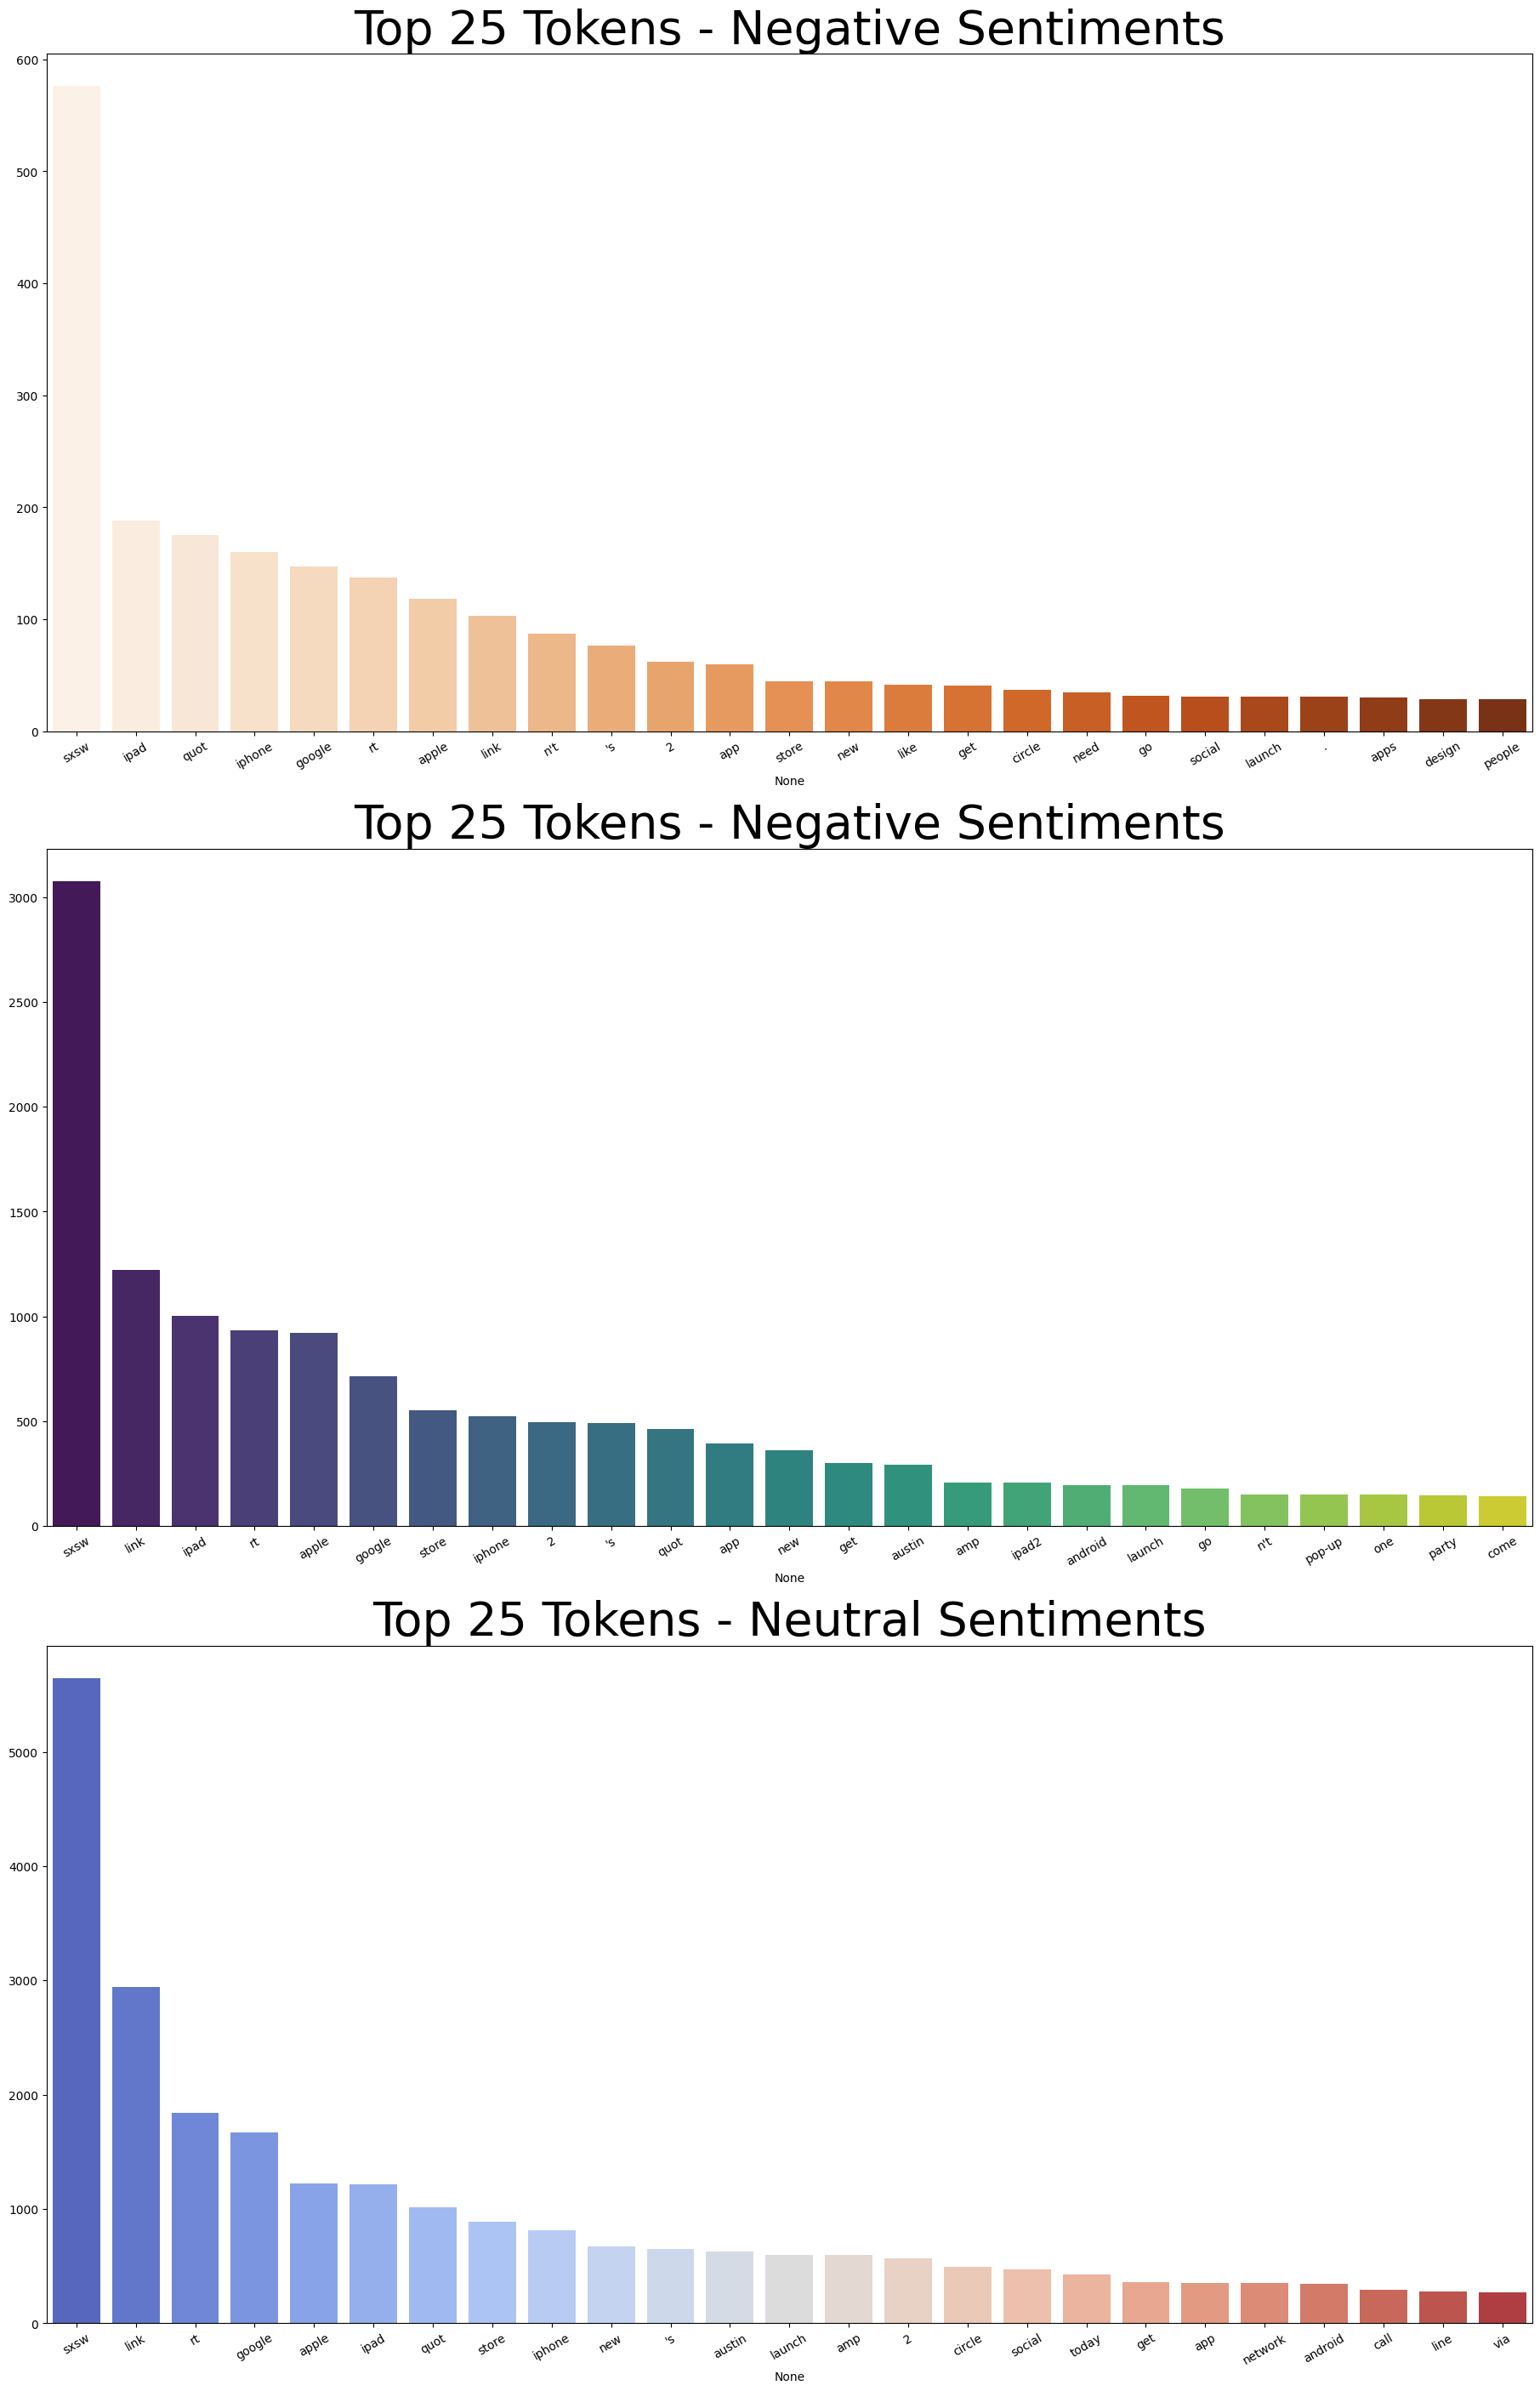

In [21]:
#create subplots
fig,axes = plt.subplots(3,1, figsize = (18, 28), constrained_layout = True)
axes = axes.flatten()

# define colormaps
colormaps = ["Oranges", "viridis", "coolwarm"]

# creating Freqdist for whole Bow, keeping the 25 most common tokens
neg_tokens = word_tokenize(negative_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_neg = FreqDist(neg_tokens).most_common(25)

all_fdist_neg = pd.Series(dict(all_fdist_neg)) #conversion to panda series for ease of plotting

#bar plot on first subplot
colors = sns.color_palette(colormaps[0], len(all_fdist_neg))
sns.barplot(
    x=all_fdist_neg.index, 
    y=all_fdist_neg.values,
    ax=axes[0],
    palette=colors)
axes[0].set_title("Top 25 Tokens - Negative Sentiments", fontsize = 40)
axes[0].tick_params(axis='x', rotation=30)
fig.savefig("../images/top25_negative_words.jpeg", format="jpeg", dpi=300)


# creating Freqdist for whole Bow, keeping the 25 most common tokens
pos_tokens = word_tokenize(positive_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_pos = FreqDist(pos_tokens).most_common(25)

all_fdist_pos = pd.Series(dict(all_fdist_pos)) #conversion to panda series for ease of plotting

#bar plot on second subplot
colors = sns.color_palette(colormaps[1], len(all_fdist_pos))
sns.barplot(
    x=all_fdist_pos.index, 
    y=all_fdist_pos.values,
    ax=axes[1],
    palette=colors)
axes[1].set_title("Top 25 Tokens - Negative Sentiments", fontsize = 40)
axes[1].tick_params(axis='x', rotation=30)
fig.savefig("../images/top25_positive_words.jpeg", format="jpeg", dpi=300)


# creating Freqdist for whole Bow, keeping the 25 most common tokens
neu_tokens = word_tokenize(neutral_words) # tokenize negative words

#frequency distriution for top 25 tokens
all_fdist_neu = FreqDist(neu_tokens).most_common(25)

all_fdist_neu = pd.Series(dict(all_fdist_neu)) #conversion to panda series for ease of plotting

#bar plot on third subplot
colors = sns.color_palette(colormaps[2], len(all_fdist_neu))
sns.barplot(
    x=all_fdist_neu.index, 
    y=all_fdist_neu.values,
    ax=axes[2],
    palette=colors)
axes[2].set_title("Top 25 Tokens - Neutral Sentiments", fontsize = 40)
axes[2].tick_params(axis='x', rotation=30)
fig.savefig("../images/top25_neutral_words.jpeg", format="jpeg", dpi=300)

plt.show()

# **4. Modelling**
## **4.1 Data Preprocessing**
Select the feature variable (X) and target variable (y). 
Split data into train and test sets for model testing and evaluation

In [22]:
# split data into X and y

X = sentiment_data["cleaned_text"]
y = sentiment_data["sentiment"] # target variable

# data split into train and test 
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42,shuffle=True)

**Model Statistics**
Accuracy and Recall will be the main metric used to track model performance. However, accuracy recall, auc and f1 score will also be computed to provide additional details about the model using sklearn's classification_report function().